#### This jupyter notebook contains a sample code that represents my work on classification machine learning model to predict Labels

**caveat: the performance of the model given the dummy dataset is terrible. It was much better with a dataset for the problem that it meant to solve. This highlights the importance of the quality of data for machine learning.


we start by creating a dummy dataset before proceeding to data preparation, model building, hyperparameter tuning, and evaluation of different classical and ensemble algorithms 

In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1. Dataset Preparation steps

In [2]:
# Create a dummy dataset of 100,000 rows in total that fit the problem
# Define the number of rows for each dataframe
num_rows = 100000

df = pd.DataFrame({
    'defect_1': np.random.randint(0, 2, size=num_rows),
    'defect_2': np.random.randint(0, 2, size=num_rows),
    'defect_3': np.random.randint(0, 2, size=num_rows),
    'defect_4': np.random.randint(0, 2, size=num_rows),
    'defect_5': np.random.randint(0, 2, size=num_rows),
    'defect_1_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_2_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_3_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_4_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'defect_5_Type': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'Reference': np.random.randint(0, 10, size=num_rows),
    'Lane': np.random.choice(['V1', 'V2'], size=num_rows),
    'TailleZone': np.random.randint(0, 100, size=num_rows),
    'Courbure': np.random.uniform(0, 1, size=num_rows),
    'CourbureVert': np.random.uniform(0, 1, size=num_rows),
    'Vitesse': np.random.uniform(0, 100, size=num_rows),
    'SensMarche': np.random.choice(['Forward', 'Backward'], size=num_rows),
    'Lat_acc_tete_Max': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_tete_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_tete_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_tete_Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_tete_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_milieu_Max': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_milieu_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_milieu_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_milieu_Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_milieu_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_queue_Max': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_queue_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_queue_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Lat_acc_queue_Avg': np.random.uniform(0, 1, size=num_rows),
    'Lat_acc_queue_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_tete_Max': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_tete_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_tete_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_tete_Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_tete_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_milieu_Max': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_milieu_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_milieu_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_milieu_Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_milieu_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_queue_Max': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_queue_Max_Pos': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_queue_Max_Pos_Moy': np.random.uniform(0, 100, size=num_rows),
    'Vert_acc_queue_Avg': np.random.uniform(0, 1, size=num_rows),
    'Vert_acc_queue_P2Avg': np.random.uniform(0, 1, size=num_rows),
    'G_Mean': np.random.uniform(0, 1, size=num_rows),
    'AUC': np.random.uniform(0, 1, size=num_rows),
    'F-Measure': np.random.uniform(0, 1, size=num_rows),
    'Specificity': np.random.uniform(0, 1, size=num_rows),
    'Precision': np.random.uniform(0, 1, size=num_rows),
    'Recall': np.random.uniform(0, 1, size=num_rows),
    'TPR': np.random.uniform(0, 1, size=num_rows),
    'FPR': np.random.uniform(0, 1, size=num_rows),
    'TNR': np.random.uniform(0, 1, size=num_rows),
    'FNR': np.random.uniform(0, 1, size=num_rows),
    'Youden': np.random.uniform(0, 1, size=num_rows),
    'Balanced_Accuracy': np.random.uniform(0, 1, size=num_rows),
    'ROC_Curve': np.random.uniform(0, 1, size=num_rows),
    'PR_Curve': np.random.uniform(0, 1, size=num_rows),
    'AP': np.random.uniform(0, 1, size=num_rows)
})

# Display the DataFrame
df.head()

,defect_1,defect_2,defect_3,defect_4,defect_5,defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type,...,Recall,TPR,FPR,TNR,FNR,Youden,Balanced_Accuracy,ROC_Curve,PR_Curve,AP
0,0,1,0,0,1,D,D,C,C,B,...,0.822777,0.435442,0.969205,0.300649,0.344244,0.990124,0.194701,0.855578,0.729733,0.575982
1,0,0,0,1,0,C,A,A,C,A,...,0.287993,0.570625,0.492448,0.199096,0.053197,0.321194,0.603665,0.367773,0.385339,0.218806
2,1,1,1,0,1,B,B,B,D,A,...,0.973183,0.746135,0.836329,0.061496,0.684760,0.893113,0.529915,0.087472,0.197169,0.404432
3,1,1,0,0,1,A,B,B,A,B,...,0.167534,0.874471,0.321978,0.385309,0.487941,0.999110,0.445915,0.067640,0.896716,0.650193
4,0,0,0,0,1,B,D,A,A,A,...,0.910177,0.305891,0.239071,0.823517,0.849586,0.157490,0.097317,0.125099,0.728263,0.608657


In [3]:
print(df.columns.tolist())

['defect_1', 'defect_2', 'defect_3', 'defect_4', 'defect_5', 'defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type', 'Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg', 'G_Mean', 'AUC', 'F-Measure', 'Specif

In [4]:
# Remove unwanted columns
geo_param_to_remove = ['defect_1', 'defect_2', 'defect_3', 'defect_4', 'defect_5']
for col in df.columns.tolist():
    if 'PR' in col or 'NR' in col:
        geo_param_to_remove.append(col)

zone_info_to_remove = ['G_Mean', 'AUC', 'F-Measure', 'Specificity', 'Precision', 'Recall' 
                       , 'Youden', 'Balanced_Accuracy', 'ROC_Curve', 'PR_Curve', 'AP']

remove_list = geo_param_to_remove + zone_info_to_remove

In [5]:
df.drop(remove_list, axis=1, inplace=True)
print(df.columns.tolist())

['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type', 'Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg']


In [6]:
df.shape

(100000, 42)

In [7]:
# More columns and rows filtering can be done here, in the original data there are others
df["Lane"] = df.apply(lambda x: 'V1' if 'V1' in x["Lane"] else 'V2', axis=1)

In [8]:
# check for null values, in this case there isn't any because it's a dummy dataset
print(df.columns[df.isnull().any()])

Index([], dtype='object')


In [9]:
#Create a new column that collects every defect types that exist in the zone which will be used for stratification
Defect_types = ['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
df["labels"] = df.apply(lambda x: ','.join(x[x.index.isin(Defect_types)].index
                                           [x[x.index.isin(Defect_types)] != 'A' ]), axis=1)

#### Split the df into final_test_set and global_train_set using defect combination

In [10]:
# Find row with a unique combination of types that only have one sample which will create problem during split
df["labels"].value_counts().loc[lambda x: x<2]

Series([], Name: labels, dtype: int64)

In [11]:
# Get the row that have unique combination (we will add them to the test set), before dropping them from the main df
unique_combination_ind = df["labels"].value_counts().loc[lambda x: x<2].index
unique_combination_df = df[df["labels"].isin(unique_combination_ind)]

#print(unique_combination_df)

# drop rows with unique_combination
#print("before drop: ", df.shape)
df = df.drop(df[df["labels"].isin(unique_combination_ind)].index).reset_index(drop=True)
#print("after drop: ", df.shape)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Defect_cat is 0 for without Niv or Nall, 1 for with Niv, Nall, or Both 
for train_index, test_index in split.split(df, df["labels"]):
    Global_train_set = df.loc[train_index]
    Final_test_set_original = df.loc[test_index]

In [14]:
# Add the unique combination rows to the Final_test_set
Final_test_set_original = pd.concat([Final_test_set_original, unique_combination_df], ignore_index=True)

Final_test_set_original["labels"].value_counts()

defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type    4734
defect_1_Type,defect_2_Type,defect_3_Type,defect_5_Type                  1603
defect_1_Type,defect_2_Type,defect_4_Type,defect_5_Type                  1600
defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type                  1583
defect_1_Type,defect_3_Type,defect_4_Type,defect_5_Type                  1582
defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type                  1568
defect_2_Type,defect_3_Type,defect_4_Type                                 543
defect_1_Type,defect_2_Type,defect_3_Type                                 537
defect_1_Type,defect_4_Type,defect_5_Type                                 535
defect_1_Type,defect_3_Type,defect_5_Type                                 534
defect_3_Type,defect_4_Type,defect_5_Type                                 534
defect_2_Type,defect_3_Type,defect_5_Type                                 527
defect_1_Type,defect_2_Type,defect_4_Type                       

In [15]:
# Drop the labels colmun from test and train sets
Global_train_set = Global_train_set.drop("labels", axis=1)
Final_test_set_original = Final_test_set_original.drop("labels", axis=1)

In [16]:
Global_train_set.head()

,defect_1_Type,defect_2_Type,defect_3_Type,defect_4_Type,defect_5_Type,Reference,Lane,TailleZone,Courbure,CourbureVert,...,Vert_acc_milieu_Max,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg
41865,A,C,A,C,A,0,V1,72,0.208951,0.606896,...,0.905396,37.544277,49.289932,0.754303,0.301337,0.890809,86.361178,91.888751,0.677081,0.686660
71755,C,C,C,A,B,2,V1,55,0.567851,0.798085,...,0.406362,22.134893,97.297302,0.057798,0.757654,0.822322,11.185659,72.559423,0.581428,0.835744
27506,A,C,D,D,D,4,V1,92,0.071343,0.687940,...,0.190775,27.378394,71.036832,0.602301,0.364936,0.715889,29.833565,17.281313,0.017870,0.636451
81915,A,B,A,C,C,0,V1,5,0.218358,0.608949,...,0.715811,95.706315,7.458945,0.695200,0.876993,0.994526,50.824356,81.578388,0.712349,0.053036
50373,C,C,B,B,C,2,V2,71,0.062902,0.882730,...,0.412475,68.919184,64.241055,0.619083,0.221865,0.379381,87.778234,7.489518,0.545681,0.427628


#### End final test set split

# Classifier 2-A training

In [17]:
df = Global_train_set.copy()

In [18]:
# Create the 'long_defect_cat' column where 0 for defect_4 and defect_5 are 'A', 1 for defect_4, defect_5, or Both being others
df["long_defect_cat"] = df.apply(lambda x: 0 if x['defect_4_Type'] == 'A' or x['defect_5_Type'] == 'A' else 1, axis=1)
#df[['Niv_Type','Nall_Type',"long_defect_cat"]]

In [19]:
# Drop all '_type' columns and AB_tete and AC_tete
df.drop(['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
        , axis=1, inplace=True)
print(df.columns.tolist())

['Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg', 'long_defect_cat']


In [20]:
# Find if there is any column that is not numeric 
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.head()

,Lane,SensMarche
41865,V1,Forward
71755,V1,Backward
27506,V1,Forward
81915,V1,Backward
50373,V2,Forward


In [21]:
# Add categorical columns that are number manually can convert them to categorical type
other_cat_col = ['Reference']
df[other_cat_col] = df[other_cat_col].astype("category")
df[other_cat_col].dtypes

Reference    category
dtype: object

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [23]:
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
#print(df_cat_encoded)

df[df_cat.columns.tolist()] = df_cat_encoded
df[df_cat.columns.tolist()] = df[df_cat.columns.tolist()].astype("category")
#df[df_cat.columns.tolist()].value_counts()

end of step 1.

### 2. Data Visualisation on train set

This is a step to see the influences of each feature (or representative of a feature) on labels. The insight acquired in this step can be used for feature selection. However, we are uisng randomly generated dataset and won't be seeing anything so we skip this part. 

### 4. Oversampling the train set

In [24]:
y_train = df["long_defect_cat"]
X_train = df.drop("long_defect_cat", axis=1)
y_train.value_counts()

1    74933
0     5067
Name: long_defect_cat, dtype: int64

In [25]:
#We check the ratio of the labels
df["long_defect_cat"].value_counts() / len(df)

1    0.936662
0    0.063338
Name: long_defect_cat, dtype: float64

We want more class 0 so use oversampling to make it 50:50

In [26]:
from collections import Counter
counter = Counter(y_train)
print('Before oversampling', counter)

Before oversampling Counter({1: 74933, 0: 5067})


In [27]:
oversampling = True

In [28]:
if oversampling:
    from imblearn.over_sampling import ADASYN
    ada = ADASYN(sampling_strategy=1, random_state = 42) # sampling_strategy = float only works for Binary 
    
    X_train_pre_transf, y_train_pre_transf = ada.fit_resample(X_train, y_train)
    counter = Counter(y_train_pre_transf)
    print('After', counter)
else:
    X_train_pre_transf = X_train
    y_train_pre_transf = y_train

After Counter({0: 76110, 1: 74933})


In [29]:
#print(X_train_pre_transf[df_cat.columns.tolist()].value_counts())
X_train_pre_transf.head()

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg
0,0,0.0,72,0.208951,0.606896,37.029094,1.0,0.724853,40.485842,22.184719,...,0.905396,37.544277,49.289932,0.754303,0.301337,0.890809,86.361178,91.888751,0.677081,0.686660
1,2,0.0,55,0.567851,0.798085,57.191099,0.0,0.115556,64.006048,27.548878,...,0.406362,22.134893,97.297302,0.057798,0.757654,0.822322,11.185659,72.559423,0.581428,0.835744
2,4,0.0,92,0.071343,0.687940,74.292031,1.0,0.561670,64.371349,80.608878,...,0.190775,27.378394,71.036832,0.602301,0.364936,0.715889,29.833565,17.281313,0.017870,0.636451
3,0,0.0,5,0.218358,0.608949,59.237997,0.0,0.728388,14.884909,80.736501,...,0.715811,95.706315,7.458945,0.695200,0.876993,0.994526,50.824356,81.578388,0.712349,0.053036
4,2,1.0,71,0.062902,0.882730,54.048309,1.0,0.193552,24.668405,49.470311,...,0.412475,68.919184,64.241055,0.619083,0.221865,0.379381,87.778234,7.489518,0.545681,0.427628


end of step 4.

### 5. Transformation

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

In [31]:
X_train_set = X_train_pre_transf.copy()

In [32]:
cat_attribs = X_train_set.select_dtypes(include='category').columns.tolist()
#print(cat_attribs)

X_train_num_lst = X_train_set.drop(cat_attribs, axis=1).columns.tolist()
X_train_cat_lst = X_train_set[cat_attribs].columns.tolist()

print(X_train_num_lst)
print(X_train_cat_lst)

['TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg']
['Reference', 'Lane', 'SensMarche']


In [33]:
# Create a transforamtion class to add, combine, fuse, extract features for the numeric PL
# stat_feature_head_to_tail is to use only the absolute 'ab_maximum' or 'average' value of each statistical feature from head, middle, or tail measurement (and None means to keep all of them)  
class Attrib_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, stat_feature_head_to_tail = 'ab_maximum'):
        self.stat_feature_head_to_tail = stat_feature_head_to_tail
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.stat_feature_head_to_tail is not None:
            stat_feature = ['Max', 'Max_Pos', 'Max_Pos_Moy', 'Avg', 'P2Avg']
            acc_measurement = ['Lat_acc', 'Vert_acc']
            
            new_X = X.copy() # so the original df is not changed
            # See the commnad line argument and match it to pre-defined case 
            match self.stat_feature_head_to_tail:
                case 'ab_maximum':
                    for stat in stat_feature:
                        for acc in acc_measurement:
                            # get a new column name
                            col_name = acc + '_' + stat
                            
                            # create a list of all measurement location of the acceleration stat of interest
                            acc_tete = acc + '_tete_' + stat
                            acc_milieu = acc + '_milieu_' + stat
                            acc_queue = acc + '_queue_' + stat
                            all_location_list = [acc_tete, acc_milieu, acc_queue]
                            
                            # Get the absolute maximum value of each row, keep the sign, and put them in a new colmun 
                            row_max = X[all_location_list].abs().max(axis=1)
                            new_X[col_name] = X[all_location_list].max(axis=1).mask(lambda x: x < row_max, -row_max)
                            new_X = new_X.drop(all_location_list, axis=1)
                
                case 'average':
                    for stat in stat_feature:
                        for acc in acc_measurement:
                            # get a new column name
                            col_name = acc + '_' + stat
                            
                            # create a list of all measurement location of the acceleration stat of interest
                            acc_tete = acc + '_tete_' + stat
                            acc_milieu = acc + '_milieu_' + stat
                            acc_queue = acc + '_queue_' + stat
                            all_location_list = [acc_tete, acc_milieu, acc_queue]
                            
                            # Get the mean value of each row and put them in a new colmun 
                            new_X[col_name] = X[all_location_list].mean(axis=1)
                            new_X = new_X.drop(all_location_list, axis=1)
                    
                case _:   # 'case _' is for any other input that does not match None or the above
                    sys.exit("please choose from 'ab_maximum', 'average', or \
                    'None' for stat_feature_head_to_tail in Attrib_transformer")
                
            #print(list(new_X.columns))
            return new_X
            
        else:
            return X


In [34]:
# Create a transforamtion class to drop unwanted features
class Attrib_drop(BaseEstimator, TransformerMixin):
    def __init__(self, d_list=[], keep_only_Vert_acc=False):
        self.d_list = d_list
        self.keep_only_Vert_acc = keep_only_Vert_acc
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.keep_only_Vert_acc:
            Vert_acc_indices = []
            for i, col in enumerate(X.columns):
                if 'Vert_acc' in col:
                    Vert_acc_indices.append(i)
            return X.iloc[:,Vert_acc_indices]
        elif self.d_list:
            keep_indices = []
            for i, col in enumerate(X.columns):
                if col not in self.d_list:
                    keep_indices.append(i)
            return X.iloc[:,keep_indices]
        else:
            return X

In [35]:
# List of the numerical features to be dropped to manually drop columns from the df
drop_list_num = [] # Here we can add columns that should be dropped from the df

num_pl = Pipeline([
    #('imputer', SimpleImputer(strategy="median")),
    ('attrib_transform', Attrib_transformer(stat_feature_head_to_tail='average')),
    ('attrib_drop', Attrib_drop(keep_only_Vert_acc=False, d_list=drop_list_num)),
    ('std_scaler', StandardScaler()),
])

#For testing num_pl
#num_prep = num_pl.fit_transform(X_train_set[X_train_num_lst])
#print('shape after transformation: ', num_prep.shape)
#num_prep

In [36]:
# List of the categorical features to be dropped to manually drop columns from the df
drop_list_cat = []

cat_pl = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('attrib_drop', Attrib_drop()),
    ('One_Hot', OneHotEncoder(sparse=False)),
])

# For testing cat_pl
#cat_prep = cat_pl.fit_transform(X_train_set[X_train_cat_lst])
#cat_prep

In [37]:
full_pl = ColumnTransformer([
    ("num", num_pl, X_train_num_lst),
    #("cat", cat_pl, X_train_cat_lst),
])

X_train_prep = full_pl.fit_transform(X_train_set)

In [38]:
print('shape after transformation: ', X_train_prep.shape)
X_train_prep

shape after transformation:  (151043, 14)


array([[ 0.80488482, -1.09990012,  0.40208365, ...,  0.94477262,
        -0.69997285,  0.41282526],
       [ 0.19421266,  0.25230262,  1.12420772, ..., -0.67243601,
        -0.3018721 ,  0.34719126],
       [ 1.52332264, -1.61835805,  0.70818961, ..., -1.08141544,
        -1.18449052,  0.68211035],
       ...,
       [-0.02131869,  0.43091085,  0.52740305, ..., -0.46254154,
        -0.51842364, -0.42214444],
       [-0.73975651, -1.26127068,  0.78844375, ...,  0.43855588,
         1.93918401, -0.92161758],
       [ 0.26605644,  1.72387195,  0.04632851, ...,  1.59572576,
        -0.75735296, -1.85486868]])

#### 5.1 OPTIONAL: PCA for unsupervised feature selectiion

In [39]:
use_PCA = True

if use_PCA:
    from sklearn.decomposition import PCA
    pca = PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
              svd_solver='auto', tol=0.0, whiten=False)
    
    X_train_prep = pca.fit_transform(X_train_prep)
    print('number of components: ', pca.n_components_)

number of components:  13


In [40]:
print('shape after transformation: ', X_train_prep.shape)
X_train_prep

shape after transformation:  (151043, 13)


array([[-1.60057635e+00,  2.37404319e-01,  1.89919683e-01, ...,
         4.57500090e-01,  1.88537573e+00,  1.37207737e+00],
       [-1.23672846e+00,  6.51396434e-01,  1.07452821e+00, ...,
        -1.40521318e+00,  4.44789894e-01, -8.98634139e-01],
       [ 6.46629644e-01, -7.07380012e-01,  9.43012286e-01, ...,
         5.95578858e-01,  7.45073369e-01,  5.33574824e-01],
       ...,
       [-2.12943840e+00, -3.52897642e-01, -3.59909781e-01, ...,
         4.97386736e-01, -6.47698561e-02,  8.50319644e-02],
       [-6.03319904e-01, -7.25611382e-01,  3.35437469e-04, ...,
        -8.77263003e-01, -1.17854445e+00,  3.00555275e-02],
       [-1.49030151e+00, -1.19179935e+00, -1.13129471e+00, ...,
        -4.95647206e-01,  1.22229294e+00,  2.55936966e-01]])

### 6. Tuning Base Classifier's hyper parameters

In [41]:
# using hyperopt for hyperparameter tuning
from hyperopt import fmin, tpe, hp, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope
from scipy import stats
from sklearn.model_selection import cross_val_score

# set number of randomised trial to carry out
n_iteration = 7

#This command can be used to randomly sample parameter set from a space
#from hyperopt.pyll.stochastic import sample as ho_sample
#ho_sample(space)

#### 6.1 SVM

In [42]:
from sklearn.svm import SVC

def tune_svm(params):
    svm_clf = SVC(**params['kernel'], C=params['C'])
    acc = cross_val_score(svm_clf, X_train_prep, y_train_pre_transf, scoring="accuracy", cv=2, n_jobs=-1).mean()
    return {"loss": -acc, "status": STATUS_OK}

space = {
    "kernel": hp.choice("kernel",[
    {"kernel": 'linear', "gamma": 'scale'}, 
    {"kernel": 'poly', "gamma": hp.loguniform("gamma_poly", np.log(0.01), np.log(0.1))},
    {"kernel": 'rbf', "gamma": hp.loguniform("gamma_rbf", np.log(0.01), np.log(0.1))},
    {"kernel": 'sigmoid', "gamma": hp.loguniform("gamma_sigmoid", np.log(0.01), np.log(0.1))},
    ]),
    "C": hp.uniform("C", 1, 10),
}

trials=Trials() # Trails() must be reassign each time to reset its value
best_search_svm = fmin(fn=tune_svm, space=space, algo=tpe.suggest, max_evals=n_iteration, trials=trials)

best_trial_svm = trials.best_trial
best_params_svm = best_trial_svm["misc"]["vals"]
best_score_svm = -best_trial_svm["result"]["loss"]

print("Best parameters:", best_params_svm)
print("Best score:", best_score_svm)

100%|███████████████████████████████████████████████| 7/7 [5:36:48<00:00, 2886.90s/trial, best loss: -0.55874156096377]
Best parameters: {'C': [9.704052240884993], 'gamma_poly': [0.011785053924241283], 'gamma_rbf': [], 'gamma_sigmoid': [], 'kernel': [1]}
Best score: 0.55874156096377


In [43]:
# refit the classifier with the best hyperparameter set
temp_params_dict = space_eval(space, best_search_svm)
final_params_svm = {
    'C': temp_params_dict['C'],
    'kernel': temp_params_dict['kernel']['kernel'],
    'gamma': temp_params_dict['kernel']['gamma'],
}

svm_clf = SVC(**final_params_svm)
svm_clf.fit(X_train_prep, y_train_pre_transf)

SVC(C=9.704052240884993, gamma=0.011785053924241283, kernel='poly')

#### 6.2 Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

def tune_LR(params):
    LR_clf = LogisticRegression(**params['solver'], C=params['C'], l1_ratio=params['l1_ratio'])
    acc = cross_val_score(LR_clf, X_train_prep, y_train_pre_transf, scoring="accuracy", cv=2, n_jobs=-1).mean()
    return {"loss": -acc, "status": STATUS_OK}

space = {
    "solver": hp.choice("solver",[
    {"solver": 'newton-cg', "penalty": hp.choice("penalty_ncg", ['l2', None])}, 
    {"solver": 'lbfgs', "penalty": hp.choice("penalty_lbfgs", ['l2', None])},
    {"solver": 'saga', "penalty": hp.choice("penalty_saga", ['elasticnet', 'l1', 'l2', None])},
    ]),
    "C": hp.uniform("C", 1.0, 10.0),
    "l1_ratio": hp.uniform("l1_ratio", 0, 1),
}

trials=Trials() # Trails() must be reassign each time to reset its value
best_search_LR = fmin(fn=tune_LR, space = space, algo=tpe.suggest, max_evals=n_iteration, trials=trials)

best_trial_LR = trials.best_trial
best_params_LR = best_trial_LR["misc"]["vals"]
best_score_LR = -best_trial_LR["result"]["loss"]

print("Best parameters:", best_params_LR)
print("Best score:", best_score_LR)

100%|█████████████████████████████████████████████████| 7/7 [00:11<00:00,  1.65s/trial, best loss: -0.5118873199988916]
Best parameters: {'C': [1.9731587368372532], 'l1_ratio': [0.45130243014950067], 'penalty_lbfgs': [], 'penalty_ncg': [], 'penalty_saga': [2], 'solver': [2]}
Best score: 0.5118873199988916


In [45]:
# refit the classifier with the best hyperparameter set
temp_params_dict = space_eval(space, best_search_LR)
final_params_LR = {
    'C': temp_params_dict['C'],
    'solver': temp_params_dict['solver']['solver'],
    'penalty': temp_params_dict['solver']['penalty'],
    'l1_ratio': temp_params_dict['l1_ratio'] if temp_params_dict['solver']['penalty'] == 'elasticnet' else None,
}

LR_clf = LogisticRegression(**final_params_LR, n_jobs=-1)
LR_clf.fit(X_train_prep, y_train_pre_transf)

LogisticRegression(C=1.9731587368372532, n_jobs=-1, solver='saga')

#### 6.3 Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

def tune_Tree(params):
    Tree_clf = DecisionTreeClassifier(**params)
    acc = cross_val_score(Tree_clf, X_train_prep, y_train_pre_transf, scoring="accuracy", cv=2, n_jobs=-1).mean()
    return {"loss": -acc, "status": STATUS_OK}

space = {
    "max_features": hp.choice("max_features",['sqrt', 'log2', None]),
    "max_depth": hp.choice("max_depth",[5, 10, 15, None]),
    "criterion": hp.choice("criterion",['gini', 'entropy', 'log_loss']),
    "min_samples_leaf": hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
}

trials=Trials() # Trails() must be reassign each time to reset its value
best_search_Tree = fmin(fn=tune_Tree, space = space, algo=tpe.suggest, max_evals=n_iteration, trials=trials)

best_trial_Tree = trials.best_trial
best_params_Tree = best_trial_Tree["misc"]["vals"]
best_score_Tree = -best_trial_Tree["result"]["loss"]

print("Best parameters:", best_params_Tree)
print("Best score:", best_score_Tree)

100%|█████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.26s/trial, best loss: -0.6703522152239905]
Best parameters: {'criterion': [2], 'max_depth': [3], 'max_features': [1], 'min_samples_leaf': [0]}
Best score: 0.6703522152239905


In [47]:
# refit the classifier with the best hyperparameter set
temp_params_dict = space_eval(space, best_search_Tree)
final_params_Tree = {
    'max_features': temp_params_dict['max_features'],
    'max_depth': temp_params_dict['max_depth'],
    'criterion': temp_params_dict['criterion'],
    'min_samples_leaf': temp_params_dict['min_samples_leaf'],
}

Tree_clf = DecisionTreeClassifier(**final_params_Tree)
Tree_clf.fit(X_train_prep, y_train_pre_transf)

DecisionTreeClassifier(criterion='log_loss', max_features='log2')

#### 6.4 KNN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

def tune_KNN(params):
    KNN_clf = KNeighborsClassifier(**params, n_jobs=-1)
    acc = cross_val_score(KNN_clf, X_train_prep, y_train_pre_transf, scoring="accuracy", cv=2, n_jobs=-1).mean()
    return {"loss": -acc, "status": STATUS_OK}

space = {
    "weights": hp.choice("weights",['uniform','distance']),
    "metric": hp.choice("metric",['minkowski','euclidean','manhattan']),
    "n_neighbors": scope.int(hp.uniform("n_neighbors", 3, 9)),
}

trials=Trials() # Trails() must be reassign each time to reset its value
best_search_KNN = fmin(fn=tune_KNN, space = space, algo=tpe.suggest, max_evals=n_iteration, trials=trials)

best_trial_KNN = trials.best_trial
best_params_KNN = best_trial_KNN["misc"]["vals"]
best_score_KNN = -best_trial_KNN["result"]["loss"]

print("Best parameters:", best_params_KNN)
print("Best score:", best_score_KNN)

100%|████████████████████████████████████████████████| 7/7 [17:54<00:00, 153.54s/trial, best loss: -0.7596976350418893]
Best parameters: {'metric': [1], 'n_neighbors': [3.251236914700896], 'weights': [1]}
Best score: 0.7596976350418893


In [49]:
# refit the classifier with the best hyperparameter set
temp_params_dict = space_eval(space, best_search_KNN)
final_params_KNN = {
    'weights': temp_params_dict['weights'],
    'metric': temp_params_dict['metric'],
    'n_neighbors': temp_params_dict['n_neighbors'],
}

KNN_clf = KNeighborsClassifier(**final_params_KNN, n_jobs=-1)
KNN_clf.fit(X_train_prep, y_train_pre_transf)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3,
                     weights='distance')

#### 6.5 MLP Classifier

In [50]:
from sklearn.neural_network import MLPClassifier

def tune_mlp(params):
    mlp_clf = MLPClassifier(**params['solver'], activation=params['activation'], 
                            hidden_layer_sizes=params['hidden_layer_sizes'], 
                            alpha=params['alpha'], max_iter=1500)
    acc = cross_val_score(mlp_clf, X_train_prep, y_train_pre_transf, scoring="accuracy", cv=2, n_jobs=-1).mean()
    return {"loss": -acc, "status": STATUS_OK}

space = {
    "solver": hp.choice("solver",[
    {"solver": 'sgd', "learning_rate": hp.choice("learning_rate_sgd", ['constant','adaptive'])}, 
    {"solver": 'lbfgs', "learning_rate": 'constant'},
    {"solver": 'adam', "learning_rate": 'constant'},
    ]),
    "activation": hp.choice("activation",['tanh', 'relu']),
    "hidden_layer_sizes": hp.choice("hidden_layer_sizes",[(10,30,10),(20,)]),
    "alpha": hp.loguniform("alpha", np.log(0.0001), np.log(0.01)),
}

trials=Trials() # Trails() must be reassign each time to reset its value
best_search_mlp = fmin(fn=tune_mlp, space = space, algo=tpe.suggest, max_evals=n_iteration, trials=trials)

best_trial_mlp = trials.best_trial
best_params_mlp = best_trial_mlp["misc"]["vals"]
best_score_mlp = -best_trial_mlp["result"]["loss"]

print("Best parameters:", best_params_mlp)
print("Best score:", best_score_mlp)

100%|████████████████████████████████████████████████| 7/7 [12:32<00:00, 107.47s/trial, best loss: -0.6672007924004572]
Best parameters: {'activation': [0], 'alpha': [0.0007780975361284449], 'hidden_layer_sizes': [1], 'learning_rate_sgd': [], 'solver': [1]}
Best score: 0.6672007924004572


In [51]:
# refit the classifier with the best hyperparameter set
temp_params_dict = space_eval(space, best_search_mlp)
final_params_mlp = {
    'activation': temp_params_dict['activation'],
    'hidden_layer_sizes': temp_params_dict['hidden_layer_sizes'],
    'alpha': temp_params_dict['alpha'],       
    'solver': temp_params_dict['solver']['solver'],
    'learning_rate': temp_params_dict['solver']['learning_rate'],
}

mlp_clf = MLPClassifier(**final_params_mlp, max_iter=1500)
mlp_clf.fit(X_train_prep, y_train_pre_transf)

MLPClassifier(activation='tanh', alpha=0.0007780975361284449,
              hidden_layer_sizes=(20,), max_iter=1500, solver='lbfgs')

### 7. Ensemble techniques to improve model's performance

#### 7.1 as a reference RandomForest (which is a Bagging classifier of DT) from Scikit-learn is used

In [52]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(**final_params_Tree, n_jobs=-1)

rnd_clf.fit(X_train_prep, y_train_pre_transf)

RandomForestClassifier(criterion='log_loss', max_features='log2', n_jobs=-1)

#### 7.2 Bagging classifier on best_model from the previous step

#### 7.3 CatBoost (DT based) becuase of good perofrmance with previous study

In [53]:
#pip install catboost

In [54]:
from catboost import CatBoostClassifier

def tune_CatB(params):
    CatB_clf = CatBoostClassifier(**params)
    acc = cross_val_score(CatB_clf, X_train_prep, y_train_pre_transf, scoring="accuracy", cv=2).mean()
    return {"loss": -acc, "status": STATUS_OK}

space = {
    "iterations": hp.choice("iterations",[30, 50, 70, 90, 100]),
    "depth": hp.choice("depth",[3, 5, 10, 15, None]),
    "learning_rate": hp.loguniform("learning_rate", np.log(0.05), np.log(0.5)),
}


trials=Trials() # Trails() must be reassign each time to reset its value
best_search_CatB = fmin(fn=tune_CatB, space = space, algo=tpe.suggest, max_evals=n_iteration, trials=trials)

best_trial_CatB = trials.best_trial
best_params_CatB = best_trial_CatB["misc"]["vals"]
best_score_CatB = -best_trial_CatB["result"]["loss"]

print("Best parameters:", best_params_CatB)
print("Best score:", best_score_CatB)

  0%|                                                                            | 0/7 [00:00<?, ?trial/s, best loss=?]0:	learn: 0.6874611	total: 237ms	remaining: 21.1s
1:	learn: 0.6829735	total: 247ms	remaining: 10.8s
2:	learn: 0.6792266	total: 255ms	remaining: 7.39s
3:	learn: 0.6759123	total: 263ms	remaining: 5.65s
4:	learn: 0.6726832	total: 270ms	remaining: 4.59s
5:	learn: 0.6699108	total: 278ms	remaining: 3.88s
6:	learn: 0.6676551	total: 285ms	remaining: 3.37s
7:	learn: 0.6650061	total: 292ms	remaining: 2.99s
8:	learn: 0.6629257	total: 299ms	remaining: 2.69s
9:	learn: 0.6607620	total: 306ms	remaining: 2.44s
10:	learn: 0.6588020	total: 313ms	remaining: 2.25s
11:	learn: 0.6569197	total: 319ms	remaining: 2.07s
12:	learn: 0.6552239	total: 325ms	remaining: 1.93s
13:	learn: 0.6536946	total: 332ms	remaining: 1.8s
14:	learn: 0.6519640	total: 338ms	remaining: 1.69s
15:	learn: 0.6505079	total: 344ms	remaining: 1.59s
16:	learn: 0.6489253	total: 351ms	remaining: 1.51s
17:	learn: 0.6474890	tota

83:	learn: 0.6207141	total: 622ms	remaining: 44.4ms
84:	learn: 0.6204005	total: 631ms	remaining: 37.1ms
85:	learn: 0.6201454	total: 639ms	remaining: 29.7ms
86:	learn: 0.6198047	total: 646ms	remaining: 22.3ms
87:	learn: 0.6195142	total: 654ms	remaining: 14.9ms
88:	learn: 0.6191632	total: 662ms	remaining: 7.43ms
89:	learn: 0.6189119	total: 669ms	remaining: 0us
 14%|███████                                          | 1/7 [00:03<00:22,  3.73s/trial, best loss: -0.6564025529325774]0:	learn: 0.6747102	total: 3.25s	remaining: 5m 22s
1:	learn: 0.6611379	total: 5.29s	remaining: 4m 19s
2:	learn: 0.6492943	total: 7.64s	remaining: 4m 7s
3:	learn: 0.6391690	total: 10s	remaining: 4m
4:	learn: 0.6295053	total: 12.5s	remaining: 3m 57s
5:	learn: 0.6213702	total: 14.8s	remaining: 3m 52s
6:	learn: 0.6133086	total: 17.1s	remaining: 3m 47s
7:	learn: 0.6038669	total: 19.6s	remaining: 3m 44s
8:	learn: 0.5960810	total: 21.9s	remaining: 3m 41s
9:	learn: 0.5861941	total: 24.3s	remaining: 3m 38s
10:	learn: 0.5797

50:	learn: 0.4062256	total: 1m 44s	remaining: 1m 40s
51:	learn: 0.4027835	total: 1m 46s	remaining: 1m 38s
52:	learn: 0.3997595	total: 1m 49s	remaining: 1m 36s
53:	learn: 0.3979402	total: 1m 51s	remaining: 1m 35s
54:	learn: 0.3961855	total: 1m 53s	remaining: 1m 33s
55:	learn: 0.3936227	total: 1m 56s	remaining: 1m 31s
56:	learn: 0.3914983	total: 1m 58s	remaining: 1m 29s
57:	learn: 0.3897724	total: 2m	remaining: 1m 27s
58:	learn: 0.3877037	total: 2m 2s	remaining: 1m 24s
59:	learn: 0.3854996	total: 2m 4s	remaining: 1m 22s
60:	learn: 0.3828436	total: 2m 6s	remaining: 1m 20s
61:	learn: 0.3814505	total: 2m 8s	remaining: 1m 18s
62:	learn: 0.3792185	total: 2m 10s	remaining: 1m 16s
63:	learn: 0.3770447	total: 2m 12s	remaining: 1m 14s
64:	learn: 0.3750288	total: 2m 14s	remaining: 1m 12s
65:	learn: 0.3723384	total: 2m 16s	remaining: 1m 10s
66:	learn: 0.3706358	total: 2m 18s	remaining: 1m 8s
67:	learn: 0.3668615	total: 2m 20s	remaining: 1m 6s
68:	learn: 0.3647710	total: 2m 22s	remaining: 1m 4s
69:	

39:	learn: 0.5597103	total: 3.24s	remaining: 2.43s
40:	learn: 0.5575646	total: 3.32s	remaining: 2.35s
41:	learn: 0.5558663	total: 3.4s	remaining: 2.27s
42:	learn: 0.5539814	total: 3.49s	remaining: 2.19s
43:	learn: 0.5525219	total: 3.57s	remaining: 2.11s
44:	learn: 0.5514426	total: 3.64s	remaining: 2.02s
45:	learn: 0.5503770	total: 3.72s	remaining: 1.94s
46:	learn: 0.5484741	total: 3.8s	remaining: 1.86s
47:	learn: 0.5467357	total: 3.88s	remaining: 1.78s
48:	learn: 0.5456757	total: 3.96s	remaining: 1.7s
49:	learn: 0.5434613	total: 4.04s	remaining: 1.61s
50:	learn: 0.5419506	total: 4.12s	remaining: 1.53s
51:	learn: 0.5398597	total: 4.2s	remaining: 1.45s
52:	learn: 0.5371960	total: 4.28s	remaining: 1.37s
53:	learn: 0.5360964	total: 4.36s	remaining: 1.29s
54:	learn: 0.5346469	total: 4.44s	remaining: 1.21s
55:	learn: 0.5314940	total: 4.53s	remaining: 1.13s
56:	learn: 0.5298574	total: 4.61s	remaining: 1.05s
57:	learn: 0.5273869	total: 4.69s	remaining: 970ms
58:	learn: 0.5260654	total: 4.77s	r

6:	learn: 0.6675876	total: 580ms	remaining: 1.91s
7:	learn: 0.6648765	total: 662ms	remaining: 1.82s
8:	learn: 0.6625290	total: 742ms	remaining: 1.73s
9:	learn: 0.6602451	total: 822ms	remaining: 1.64s
10:	learn: 0.6580529	total: 904ms	remaining: 1.56s
11:	learn: 0.6556273	total: 986ms	remaining: 1.48s
12:	learn: 0.6535073	total: 1.06s	remaining: 1.39s
13:	learn: 0.6514674	total: 1.15s	remaining: 1.31s
14:	learn: 0.6494844	total: 1.24s	remaining: 1.24s
15:	learn: 0.6473891	total: 1.33s	remaining: 1.16s
16:	learn: 0.6454990	total: 1.41s	remaining: 1.08s
17:	learn: 0.6437897	total: 1.5s	remaining: 998ms
18:	learn: 0.6416595	total: 1.58s	remaining: 918ms
19:	learn: 0.6400150	total: 1.67s	remaining: 833ms
20:	learn: 0.6383654	total: 1.74s	remaining: 748ms
21:	learn: 0.6367406	total: 1.82s	remaining: 663ms
22:	learn: 0.6352386	total: 1.9s	remaining: 579ms
23:	learn: 0.6337067	total: 1.98s	remaining: 495ms
24:	learn: 0.6322843	total: 2.06s	remaining: 411ms
25:	learn: 0.6308320	total: 2.14s	rem

In [55]:
# refit the classifier with the best hyperparameter set
temp_params_dict = space_eval(space, best_search_CatB)
final_params_CatB = {
    'iterations': temp_params_dict['iterations'],
    'depth': temp_params_dict['depth'],
    'learning_rate': temp_params_dict['learning_rate'],
}

CatB_clf = CatBoostClassifier(**final_params_CatB)
CatB_clf.fit(X_train_prep, y_train_pre_transf)

0:	learn: 0.6795148	total: 2.02s	remaining: 3m 20s
1:	learn: 0.6675078	total: 4.03s	remaining: 3m 17s
2:	learn: 0.6568379	total: 6.04s	remaining: 3m 15s
3:	learn: 0.6456394	total: 8.08s	remaining: 3m 13s
4:	learn: 0.6366760	total: 10.1s	remaining: 3m 11s
5:	learn: 0.6289348	total: 12.1s	remaining: 3m 10s
6:	learn: 0.6217033	total: 14.2s	remaining: 3m 8s
7:	learn: 0.6146646	total: 16.2s	remaining: 3m 5s
8:	learn: 0.6077409	total: 18.2s	remaining: 3m 3s
9:	learn: 0.6012146	total: 20.2s	remaining: 3m 1s
10:	learn: 0.5957892	total: 22.2s	remaining: 2m 59s
11:	learn: 0.5900317	total: 24.2s	remaining: 2m 57s
12:	learn: 0.5857767	total: 26.2s	remaining: 2m 55s
13:	learn: 0.5809494	total: 28.3s	remaining: 2m 53s
14:	learn: 0.5755005	total: 30.3s	remaining: 2m 51s
15:	learn: 0.5692275	total: 32.4s	remaining: 2m 49s
16:	learn: 0.5635649	total: 34.4s	remaining: 2m 47s
17:	learn: 0.5573236	total: 36.4s	remaining: 2m 45s
18:	learn: 0.5523336	total: 38.4s	remaining: 2m 43s
19:	learn: 0.5473029	total

#### 7.4 AdaBoost with the plot_model

#### 7.5 Voting of all base classifier as well as RandomForest and CatBoost

In [56]:
all_estimator = [('SVM', svm_clf), ('LR', LR_clf), ('DT', Tree_clf), ('KNN', KNN_clf), 
                 ('MLP', mlp_clf), ('Rand_Forest', rnd_clf), ('CatB', CatB_clf)]

In [57]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=all_estimator, voting='hard', n_jobs=-1)

voting_clf.fit(X_train_prep, y_train_pre_transf)

VotingClassifier(estimators=[('SVM',
                              SVC(C=9.704052240884993,
                                  gamma=0.011785053924241283, kernel='poly')),
                             ('LR',
                              LogisticRegression(C=1.9731587368372532,
                                                 n_jobs=-1, solver='saga')),
                             ('DT',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_features='log2')),
                             ('KNN',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_jobs=-1, n_neighbors=3,
                                                   weights='distance')),
                             ('MLP',
                              MLPClassifier(activation='tanh',
                                            alpha=0.0007780975361284449,
                                            hidden_layer_sizes=(20,),
                                            max_iter=1500, solver='lbfgs')),
                             ('Rand_Forest',
                              RandomForestClassifier(criterion='log_loss',
                                                     max_features='log2',
                                                     n_jobs=-1)),
                             ('CatB',
                              <catboost.core.CatBoostClassifier object at 0x0000023E64FDFFA0>)],
                 n_jobs=-1)

#### 7.6 Stacking classifier, using best_model again as the final estimator

 # Classifier 2-B

### 1. Data Preparation

In [58]:
df = Global_train_set.copy()

In [59]:
df = df.drop(df[(df['defect_4_Type'] == 'A') & (df['defect_5_Type'] == 'A')].index).reset_index(drop=True)

In [60]:
df["other_defect_cat"] = df.apply(lambda x: 0 if 
                                  x['defect_1_Type'] == 'A' and 
                                  x['defect_2_Type'] == 'A' and
                                  x['defect_3_Type'] == 'A'
                                  else 1, axis=1)

In [61]:
# Drop all '_type' columns and AB_tete and AC_tete
df.drop(['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
        , axis=1, inplace=True)
print(df.columns.tolist())

['Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg', 'other_defect_cat']


In [62]:
# Find if there is any column that is not numeric 
df_cat = df.select_dtypes(exclude=[np.number])
#df_cat.head()

# Add categorical columns that are number manually can convert them to categorical type
other_cat_col = ['Reference']
df[other_cat_col] = df[other_cat_col].astype("category")
#df[other_cat_col].dtypes

In [63]:
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
#print(df_cat_encoded)

df[df_cat.columns.tolist()] = df_cat_encoded
df[df_cat.columns.tolist()] = df[df_cat.columns.tolist()].astype("category")
#df[df_cat.columns.tolist()].value_counts()

In [64]:
df.head()

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg,other_defect_cat
0,0,0.0,72,0.208951,0.606896,37.029094,1.0,0.724853,40.485842,22.184719,...,37.544277,49.289932,0.754303,0.301337,0.890809,86.361178,91.888751,0.677081,0.686660,1
1,2,0.0,55,0.567851,0.798085,57.191099,0.0,0.115556,64.006048,27.548878,...,22.134893,97.297302,0.057798,0.757654,0.822322,11.185659,72.559423,0.581428,0.835744,1
2,4,0.0,92,0.071343,0.687940,74.292031,1.0,0.561670,64.371349,80.608878,...,27.378394,71.036832,0.602301,0.364936,0.715889,29.833565,17.281313,0.017870,0.636451,1
3,0,0.0,5,0.218358,0.608949,59.237997,0.0,0.728388,14.884909,80.736501,...,95.706315,7.458945,0.695200,0.876993,0.994526,50.824356,81.578388,0.712349,0.053036,1
4,2,1.0,71,0.062902,0.882730,54.048309,1.0,0.193552,24.668405,49.470311,...,68.919184,64.241055,0.619083,0.221865,0.379381,87.778234,7.489518,0.545681,0.427628,1


In [65]:
y_train = df["other_defect_cat"]
X_train = df.drop("other_defect_cat", axis=1)
y_train.value_counts()

1    73818
0     1115
Name: other_defect_cat, dtype: int64

### 2. Oversampling

In [66]:
counter = Counter(y_train)
print('Before oversampling', counter)

Before oversampling Counter({1: 73818, 0: 1115})


In [67]:
oversampling = True

if oversampling:
    from imblearn.over_sampling import ADASYN
    ada = ADASYN(sampling_strategy=1, random_state = 42)# sampling_strategy = float only works for Binary 
    
    X_train_pre_transf, y_train_pre_transf = ada.fit_resample(X_train, y_train)
    counter = Counter(y_train_pre_transf)
    print('After', counter)
else:
    X_train_pre_transf = X_train
    y_train_pre_transf = y_train

After Counter({1: 73818, 0: 73561})


### 3. Transformation

In [68]:
X_train_set = X_train_pre_transf.copy()

In [69]:
cat_attribs = X_train_set.select_dtypes(include='category').columns.tolist()
#print(cat_attribs)

X_train_num_lst = X_train_set.drop(cat_attribs, axis=1).columns.tolist()
X_train_cat_lst = X_train_set[cat_attribs].columns.tolist()

#print(X_train_num_lst)
#print(X_train_cat_lst)

In [70]:
# Create a transforamtion class to drop unwanted features
class Attrib_drop_2_B(BaseEstimator, TransformerMixin):
    def __init__(self, d_list=[], keep_only_Lat_acc=False):
        self.d_list = d_list
        self.keep_only_Lat_acc = keep_only_Lat_acc
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.keep_only_Lat_acc:
            Lat_acc_indices = []
            for i, col in enumerate(X.columns):
                if 'Lat_acc' in col:
                    Lat_acc_indices.append(i)
            return X.iloc[:,Lat_acc_indices]
        elif self.d_list:
            keep_indices = []
            for i, col in enumerate(X.columns):
                if col not in self.d_list:
                    keep_indices.append(i)
            return X.iloc[:,keep_indices]
        else:
            return X

In [71]:
# List of the numerical features to be dropped to manually drop columns from the df

drop_list_num_2_B = []


num_pl_2_B = Pipeline([
    #('imputer', SimpleImputer(strategy="median")),
    ('attrib_transform', Attrib_transformer(stat_feature_head_to_tail='average')),
    ('attrib_drop', Attrib_drop_2_B(keep_only_Lat_acc=False, d_list=drop_list_num_2_B)),
    ('std_scaler', StandardScaler()),
])

#For testing num_pl
#num_prep = num_pl.fit_transform(X_train_set[X_train_num_lst])
#print('shape after transformation: ', num_prep.shape)
#num_prep

In [72]:
# List of the categorical features to be dropped to manually drop columns from the df
drop_list_cat_2_B = ['Lane']

cat_pl_2_B = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('attrib_drop', Attrib_drop_2_B(d_list=drop_list_cat_2_B)),
    ('One_Hot', OneHotEncoder(sparse=False)),
])

# For testing cat_pl
#cat_prep = cat_pl.fit_transform(X_train_set[X_train_cat_lst])
#cat_prep

In [73]:
full_pl_2_B = ColumnTransformer([
    ("num", num_pl_2_B, X_train_num_lst),
    ("cat", cat_pl_2_B, X_train_cat_lst),
])

X_train_prep = full_pl_2_B.fit_transform(X_train_set)

C:\Users\9112325B\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 4. PCA

In [74]:
use_PCA = True

if use_PCA:
    from sklearn.decomposition import PCA
    pca_2_B = PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
              svd_solver='auto', tol=0.0, whiten=False)
    
    X_train_prep = pca_2_B.fit_transform(X_train_prep)
    print('number of components: ', pca_2_B.n_components_)

number of components:  14


In [75]:
print('shape after transformation: ', X_train_prep.shape)
X_train_prep

shape after transformation:  (147379, 14)


array([[-1.66560098, -1.2500247 , -0.9666567 , ..., -0.37340048,
         1.22894949,  1.75804602],
       [ 0.24865345, -1.63434635,  1.35370955, ...,  0.05854477,
        -0.97159318, -0.14453309],
       [-1.38182765, -0.30186142, -0.61259015, ...,  0.78980437,
        -1.95102207, -0.15275348],
       ...,
       [-1.47008818,  0.78898334,  0.6842239 , ..., -0.83493562,
        -0.07877977,  0.59237885],
       [-1.2988194 ,  1.00523736,  1.23536663, ..., -1.1866085 ,
        -0.90638845, -0.74243953],
       [-1.41741232,  1.02398389,  0.03942391, ..., -1.18889566,
        -0.47940993, -0.005473  ]])

### 5. Train the classifier

In [76]:
# using hyperopt for hyperparameter tuning
#from hyperopt import fmin, tpe, hp, Trials, space_eval, STATUS_OK
#from hyperopt.pyll import scope
#from scipy import stats
#from sklearn.model_selection import cross_val_score

# set number of randomised trial to carry out
n_iteration = 7

#This command can be used to randomly sample parameter set from a space
#from hyperopt.pyll.stochastic import sample as ho_sample
#ho_sample(space)

In [77]:
#from catboost import CatBoostClassifier

def tune_CatB_2_B(params):
    CatB_clf_2_B = CatBoostClassifier(**params)
    acc = cross_val_score(CatB_clf_2_B, X_train_prep, y_train_pre_transf, scoring="accuracy", cv=2).mean()
    return {"loss": -acc, "status": STATUS_OK}

space = {
    "iterations": hp.choice("iterations",[30, 50, 70, 90, 100]),
    "depth": hp.choice("depth",[3, 5, 10, 15, None]),
    "learning_rate": hp.loguniform("learning_rate", np.log(0.05), np.log(0.5)),
}


trials=Trials() # Trails() must be reassign each time to reset its value
best_search_CatB_2_B = fmin(fn=tune_CatB_2_B, space = space, algo=tpe.suggest, max_evals=n_iteration, trials=trials)

best_trial_CatB_2_B = trials.best_trial
best_params_CatB_2_B = best_trial_CatB_2_B["misc"]["vals"]
best_score_CatB_2_B = -best_trial_CatB_2_B["result"]["loss"]

print("Best parameters:", best_params_CatB_2_B)
print("Best score:", best_score_CatB_2_B)

  0%|                                                                            | 0/7 [00:00<?, ?trial/s, best loss=?]0:	learn: 0.6841078	total: 76ms	remaining: 2.2s
1:	learn: 0.6764191	total: 155ms	remaining: 2.17s
2:	learn: 0.6689329	total: 235ms	remaining: 2.11s
3:	learn: 0.6619221	total: 314ms	remaining: 2.04s
4:	learn: 0.6559815	total: 397ms	remaining: 1.99s
5:	learn: 0.6499338	total: 481ms	remaining: 1.92s
6:	learn: 0.6445398	total: 566ms	remaining: 1.86s
7:	learn: 0.6394628	total: 650ms	remaining: 1.79s
8:	learn: 0.6344729	total: 731ms	remaining: 1.71s
9:	learn: 0.6298237	total: 815ms	remaining: 1.63s
10:	learn: 0.6253210	total: 899ms	remaining: 1.55s
11:	learn: 0.6216956	total: 981ms	remaining: 1.47s
12:	learn: 0.6175232	total: 1.07s	remaining: 1.4s
13:	learn: 0.6136006	total: 1.15s	remaining: 1.31s
14:	learn: 0.6092179	total: 1.24s	remaining: 1.24s
15:	learn: 0.6056871	total: 1.32s	remaining: 1.15s
16:	learn: 0.6017005	total: 1.4s	remaining: 1.07s
17:	learn: 0.5971237	total: 

30:	learn: 0.4453101	total: 2.64s	remaining: 3.32s
31:	learn: 0.4413681	total: 2.72s	remaining: 3.23s
32:	learn: 0.4372255	total: 2.81s	remaining: 3.15s
33:	learn: 0.4337463	total: 2.89s	remaining: 3.06s
34:	learn: 0.4295590	total: 2.98s	remaining: 2.98s
35:	learn: 0.4247758	total: 3.06s	remaining: 2.89s
36:	learn: 0.4208672	total: 3.15s	remaining: 2.81s
37:	learn: 0.4148166	total: 3.24s	remaining: 2.73s
38:	learn: 0.4123610	total: 3.32s	remaining: 2.64s
39:	learn: 0.4096357	total: 3.4s	remaining: 2.55s
40:	learn: 0.4047315	total: 3.49s	remaining: 2.47s
41:	learn: 0.4014437	total: 3.58s	remaining: 2.38s
42:	learn: 0.3985414	total: 3.66s	remaining: 2.3s
43:	learn: 0.3951416	total: 3.74s	remaining: 2.21s
44:	learn: 0.3922537	total: 3.82s	remaining: 2.12s
45:	learn: 0.3885446	total: 3.9s	remaining: 2.04s
46:	learn: 0.3860368	total: 3.98s	remaining: 1.95s
47:	learn: 0.3823065	total: 4.07s	remaining: 1.86s
48:	learn: 0.3789459	total: 4.15s	remaining: 1.78s
49:	learn: 0.3765728	total: 4.23s	

40:	learn: 0.5450542	total: 420ms	remaining: 502ms
41:	learn: 0.5427928	total: 432ms	remaining: 494ms
42:	learn: 0.5407263	total: 442ms	remaining: 484ms
43:	learn: 0.5377556	total: 454ms	remaining: 475ms
44:	learn: 0.5363221	total: 464ms	remaining: 464ms
45:	learn: 0.5346553	total: 473ms	remaining: 453ms
46:	learn: 0.5326621	total: 484ms	remaining: 442ms
47:	learn: 0.5311102	total: 493ms	remaining: 432ms
48:	learn: 0.5292438	total: 504ms	remaining: 422ms
49:	learn: 0.5272287	total: 514ms	remaining: 411ms
50:	learn: 0.5255568	total: 524ms	remaining: 401ms
51:	learn: 0.5240075	total: 534ms	remaining: 390ms
52:	learn: 0.5221849	total: 544ms	remaining: 380ms
53:	learn: 0.5202285	total: 555ms	remaining: 370ms
54:	learn: 0.5181579	total: 566ms	remaining: 360ms
55:	learn: 0.5163895	total: 576ms	remaining: 350ms
56:	learn: 0.5150128	total: 586ms	remaining: 339ms
57:	learn: 0.5133853	total: 597ms	remaining: 329ms
58:	learn: 0.5115470	total: 607ms	remaining: 319ms
59:	learn: 0.5096916	total: 618

14:	learn: 0.6355745	total: 234ms	remaining: 1.17s
15:	learn: 0.6334183	total: 250ms	remaining: 1.16s
16:	learn: 0.6309823	total: 266ms	remaining: 1.14s
17:	learn: 0.6287691	total: 282ms	remaining: 1.13s
18:	learn: 0.6265071	total: 298ms	remaining: 1.11s
19:	learn: 0.6245241	total: 314ms	remaining: 1.1s
20:	learn: 0.6225253	total: 331ms	remaining: 1.09s
21:	learn: 0.6203743	total: 347ms	remaining: 1.07s
22:	learn: 0.6184804	total: 363ms	remaining: 1.06s
23:	learn: 0.6163647	total: 379ms	remaining: 1.04s
24:	learn: 0.6143295	total: 396ms	remaining: 1.03s
25:	learn: 0.6124141	total: 412ms	remaining: 1.01s
26:	learn: 0.6105288	total: 429ms	remaining: 1s
27:	learn: 0.6088208	total: 446ms	remaining: 988ms
28:	learn: 0.6069779	total: 465ms	remaining: 977ms
29:	learn: 0.6051780	total: 482ms	remaining: 964ms
30:	learn: 0.6036553	total: 497ms	remaining: 947ms
31:	learn: 0.6022734	total: 513ms	remaining: 930ms
32:	learn: 0.6005813	total: 529ms	remaining: 915ms
33:	learn: 0.5992259	total: 545ms	r

86:	learn: 0.5410793	total: 1.32s	remaining: 45.4ms
87:	learn: 0.5404874	total: 1.33s	remaining: 30.3ms
88:	learn: 0.5396835	total: 1.35s	remaining: 15.2ms
89:	learn: 0.5385697	total: 1.37s	remaining: 0us
 71%|███████████████████████████████████              | 5/7 [00:31<00:11,  5.53s/trial, best loss: -0.7932202194306723]0:	learn: 0.6640798	total: 87.6ms	remaining: 8.67s
1:	learn: 0.6437785	total: 177ms	remaining: 8.67s
2:	learn: 0.6273040	total: 264ms	remaining: 8.54s
3:	learn: 0.6121236	total: 362ms	remaining: 8.68s
4:	learn: 0.5970934	total: 458ms	remaining: 8.71s
5:	learn: 0.5832821	total: 544ms	remaining: 8.53s
6:	learn: 0.5737254	total: 636ms	remaining: 8.45s
7:	learn: 0.5606575	total: 744ms	remaining: 8.55s
8:	learn: 0.5482843	total: 856ms	remaining: 8.65s
9:	learn: 0.5361829	total: 955ms	remaining: 8.6s
10:	learn: 0.5276463	total: 1.05s	remaining: 8.5s
11:	learn: 0.5189118	total: 1.15s	remaining: 8.42s
12:	learn: 0.5133848	total: 1.23s	remaining: 8.26s
13:	learn: 0.5022909	tot

56:	learn: 0.3020469	total: 5.78s	remaining: 4.36s
57:	learn: 0.2993893	total: 5.88s	remaining: 4.26s
58:	learn: 0.2966240	total: 5.99s	remaining: 4.16s
59:	learn: 0.2949016	total: 6.07s	remaining: 4.05s
60:	learn: 0.2927367	total: 6.18s	remaining: 3.95s
61:	learn: 0.2882680	total: 6.28s	remaining: 3.85s
62:	learn: 0.2856037	total: 6.38s	remaining: 3.75s
63:	learn: 0.2823637	total: 6.47s	remaining: 3.64s
64:	learn: 0.2803861	total: 6.59s	remaining: 3.55s
65:	learn: 0.2768470	total: 6.7s	remaining: 3.45s
66:	learn: 0.2733321	total: 6.8s	remaining: 3.35s
67:	learn: 0.2716592	total: 6.9s	remaining: 3.25s
68:	learn: 0.2687671	total: 7s	remaining: 3.14s
69:	learn: 0.2664906	total: 7.13s	remaining: 3.05s
70:	learn: 0.2641989	total: 7.22s	remaining: 2.95s
71:	learn: 0.2623348	total: 7.31s	remaining: 2.84s
72:	learn: 0.2587832	total: 7.4s	remaining: 2.74s
73:	learn: 0.2569465	total: 7.48s	remaining: 2.63s
74:	learn: 0.2537920	total: 7.59s	remaining: 2.53s
75:	learn: 0.2509023	total: 7.69s	rema

In [78]:
# refit the classifier with the best hyperparameter set
temp_params_dict = space_eval(space, best_search_CatB_2_B)
final_params_CatB_2_B = {
    'iterations': temp_params_dict['iterations'],
    'depth': temp_params_dict['depth'],
    'learning_rate': temp_params_dict['learning_rate'],
}

CatB_clf_2_B = CatBoostClassifier(**final_params_CatB_2_B)
CatB_clf_2_B.fit(X_train_prep, y_train_pre_transf)

0:	learn: 0.6656499	total: 107ms	remaining: 10.6s
1:	learn: 0.6449559	total: 225ms	remaining: 11s
2:	learn: 0.6281660	total: 338ms	remaining: 10.9s
3:	learn: 0.6145985	total: 439ms	remaining: 10.5s
4:	learn: 0.6024813	total: 542ms	remaining: 10.3s
5:	learn: 0.5880640	total: 652ms	remaining: 10.2s
6:	learn: 0.5783946	total: 754ms	remaining: 10s
7:	learn: 0.5699321	total: 859ms	remaining: 9.88s
8:	learn: 0.5586816	total: 978ms	remaining: 9.89s
9:	learn: 0.5509038	total: 1.08s	remaining: 9.72s
10:	learn: 0.5440595	total: 1.18s	remaining: 9.58s
11:	learn: 0.5368247	total: 1.3s	remaining: 9.52s
12:	learn: 0.5297826	total: 1.41s	remaining: 9.41s
13:	learn: 0.5220956	total: 1.51s	remaining: 9.29s
14:	learn: 0.5150810	total: 1.63s	remaining: 9.23s
15:	learn: 0.5092911	total: 1.74s	remaining: 9.15s
16:	learn: 0.5030645	total: 1.86s	remaining: 9.08s
17:	learn: 0.4981419	total: 1.97s	remaining: 8.99s
18:	learn: 0.4919116	total: 2.09s	remaining: 8.91s
19:	learn: 0.4879620	total: 2.21s	remaining: 8

# Final evalution using Final_test_set

### 1. Prepare Final_test_set

In [79]:
Final_test_set = Final_test_set_original.copy()

In [80]:
# There are potentially 3 possible class labels 
# 0 = zones without 4 and 5, 1 = zones with only 4 and/or 5, 2 = zones with 4, 5, and other defects
Final_test_set["long_cat"] = Final_test_set.apply(lambda x: 
                                                  0 if 
                                                  x['defect_4_Type'] == 'A' and x['defect_5_Type'] == 'A'
                                                  else 1 if
                                                  (x['defect_4_Type'] != 'A' or x['defect_5_Type'] != 'A') and
                                                  x['defect_1_Type'] == 'A' and 
                                                  x['defect_2_Type'] == 'A' and
                                                  x['defect_3_Type'] == 'A'
                                                  else 2, axis=1)

In [81]:
Final_test_set[['defect_4_Type', 'defect_5_Type', "long_cat"]].tail(20)

,defect_4_Type,defect_5_Type,long_cat
19980,D,D,2
19981,C,C,2
19982,C,D,2
19983,D,A,2
19984,A,A,0
19985,D,B,2
19986,C,C,2
19987,D,A,2
19988,A,C,2
19989,D,B,2


In [82]:
Final_test_set.drop(['defect_1_Type', 'defect_2_Type', 'defect_3_Type', 'defect_4_Type', 'defect_5_Type']
        , axis=1, inplace=True)
print(Final_test_set.columns.tolist())

['Reference', 'Lane', 'TailleZone', 'Courbure', 'CourbureVert', 'Vitesse', 'SensMarche', 'Lat_acc_tete_Max', 'Lat_acc_tete_Max_Pos', 'Lat_acc_tete_Max_Pos_Moy', 'Lat_acc_tete_Avg', 'Lat_acc_tete_P2Avg', 'Lat_acc_milieu_Max', 'Lat_acc_milieu_Max_Pos', 'Lat_acc_milieu_Max_Pos_Moy', 'Lat_acc_milieu_Avg', 'Lat_acc_milieu_P2Avg', 'Lat_acc_queue_Max', 'Lat_acc_queue_Max_Pos', 'Lat_acc_queue_Max_Pos_Moy', 'Lat_acc_queue_Avg', 'Lat_acc_queue_P2Avg', 'Vert_acc_tete_Max', 'Vert_acc_tete_Max_Pos', 'Vert_acc_tete_Max_Pos_Moy', 'Vert_acc_tete_Avg', 'Vert_acc_tete_P2Avg', 'Vert_acc_milieu_Max', 'Vert_acc_milieu_Max_Pos', 'Vert_acc_milieu_Max_Pos_Moy', 'Vert_acc_milieu_Avg', 'Vert_acc_milieu_P2Avg', 'Vert_acc_queue_Max', 'Vert_acc_queue_Max_Pos', 'Vert_acc_queue_Max_Pos_Moy', 'Vert_acc_queue_Avg', 'Vert_acc_queue_P2Avg', 'long_cat']


In [83]:
Final_test_set.head()

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max_Pos,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg,long_cat
0,2,V1,57,0.361080,0.667772,42.784620,Backward,0.199304,86.101466,53.291262,...,34.174285,69.285416,0.623076,0.133698,0.947329,49.204398,88.263318,0.829025,0.562602,2
1,9,V2,70,0.034940,0.226607,78.875969,Forward,0.374129,20.266859,4.396197,...,49.711809,5.246095,0.627604,0.754721,0.869965,27.284191,40.892264,0.267240,0.412599,2
2,5,V1,38,0.317336,0.619888,64.251439,Forward,0.993883,73.085978,98.165762,...,40.904775,96.426845,0.885212,0.118836,0.191347,72.548121,1.640065,0.875166,0.223688,2
3,1,V1,34,0.200474,0.338707,62.406262,Backward,0.625484,81.790114,51.490684,...,82.637023,65.575102,0.086776,0.563042,0.382124,86.988303,66.646427,0.265282,0.696533,2
4,0,V2,57,0.981999,0.951780,79.947468,Backward,0.164679,51.436558,29.406334,...,65.758134,70.281101,0.760610,0.192885,0.566601,43.287932,26.527650,0.346010,0.470470,2


### 2. Make prediction with classifier 2-A 

In [84]:
# Find if there is any column that is not numeric 
Final_test_set_cat = Final_test_set.select_dtypes(exclude=[np.number])
#Final_test_set_cat.head()

# Add categorical columns that are number manually can convert them to categorical type
Final_test_set[other_cat_col] = Final_test_set[other_cat_col].astype("category")
#df[other_cat_col].dtypes

In [85]:
Final_test_set_cat_encoded = ordinal_encoder.fit_transform(Final_test_set_cat)
#print(df_cat_encoded)

Final_test_set[Final_test_set_cat.columns.tolist()] = Final_test_set_cat_encoded
Final_test_set[df_cat.columns.tolist()] = Final_test_set[Final_test_set_cat.columns.tolist()].astype("category")
#df[df_cat.columns.tolist()].value_counts()

In [86]:
Final_test_2_A = Final_test_set.copy()

In [87]:
Final_test_2_A["long_cat"] = Final_test_2_A.apply(lambda x:
                                                  0 if
                                                  x["long_cat"] == 0
                                                  else 1, axis=1)

In [88]:
Final_test_2_A["long_cat"].value_counts()

1    18734
0     1266
Name: long_cat, dtype: int64

In [89]:
X_Final_test_2_A = Final_test_2_A.drop("long_cat", axis=1)
y_Final_test_2_A = Final_test_2_A["long_cat"]

In [90]:
#Transform the X_test as the train set has been transformed
X_Final_test_2_A_prep = full_pl.transform(X_Final_test_2_A)
#print('shape before PCA: ', X_train_prep.shape)

if use_PCA:
    X_Final_test_2_A_prep = pca.transform(X_Final_test_2_A_prep)
    print('number of components: ', pca.n_components_)

print('shape after transformation: ', X_Final_test_2_A_prep.shape)

number of components:  13
shape after transformation:  (20000, 13)


In [91]:
y_Final_test_2_A_pred = voting_clf.predict(X_Final_test_2_A_prep)

In [92]:
Final_test_set["2_A_label"] = y_Final_test_2_A_pred

In [93]:
Final_test_set[["long_cat", "2_A_label"]].head(10)

,long_cat,2_A_label
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1
5,2,1
6,2,1
7,2,1
8,2,1
9,2,1


### 3. Prepare a set for 2-B by only keeping the rows that 2-A predict as 1

In [94]:
# get index of rows with 2_A_label = 1
labe_1_by_2_A_ind = Final_test_set[Final_test_set["2_A_label"] == 1].index

In [95]:
Final_test_set.iloc[labe_1_by_2_A_ind].head(10)

,Reference,Lane,TailleZone,Courbure,CourbureVert,Vitesse,SensMarche,Lat_acc_tete_Max,Lat_acc_tete_Max_Pos,Lat_acc_tete_Max_Pos_Moy,...,Vert_acc_milieu_Max_Pos_Moy,Vert_acc_milieu_Avg,Vert_acc_milieu_P2Avg,Vert_acc_queue_Max,Vert_acc_queue_Max_Pos,Vert_acc_queue_Max_Pos_Moy,Vert_acc_queue_Avg,Vert_acc_queue_P2Avg,long_cat,2_A_label
0,2,0.0,57,0.361080,0.667772,42.784620,0.0,0.199304,86.101466,53.291262,...,69.285416,0.623076,0.133698,0.947329,49.204398,88.263318,0.829025,0.562602,2,1
1,9,1.0,70,0.034940,0.226607,78.875969,1.0,0.374129,20.266859,4.396197,...,5.246095,0.627604,0.754721,0.869965,27.284191,40.892264,0.267240,0.412599,2,1
2,5,0.0,38,0.317336,0.619888,64.251439,1.0,0.993883,73.085978,98.165762,...,96.426845,0.885212,0.118836,0.191347,72.548121,1.640065,0.875166,0.223688,2,1
3,1,0.0,34,0.200474,0.338707,62.406262,0.0,0.625484,81.790114,51.490684,...,65.575102,0.086776,0.563042,0.382124,86.988303,66.646427,0.265282,0.696533,2,1
4,0,1.0,57,0.981999,0.951780,79.947468,0.0,0.164679,51.436558,29.406334,...,70.281101,0.760610,0.192885,0.566601,43.287932,26.527650,0.346010,0.470470,2,1
5,9,0.0,55,0.124518,0.340242,91.292008,0.0,0.162891,39.667452,83.503912,...,59.280922,0.345038,0.358576,0.676241,1.121272,97.582646,0.990036,0.937724,2,1
6,7,1.0,75,0.221809,0.350122,1.176228,0.0,0.773083,9.487551,74.823904,...,96.158863,0.980125,0.379650,0.887111,0.648284,25.688579,0.419368,0.267067,2,1
7,7,1.0,17,0.781347,0.534775,20.448426,0.0,0.678179,36.859531,48.950564,...,22.351253,0.988655,0.552214,0.999397,99.585715,27.450900,0.768363,0.894815,2,1
8,2,0.0,56,0.963978,0.420489,75.922683,0.0,0.842887,59.764095,49.930566,...,34.424101,0.239184,0.808981,0.281436,56.201193,70.498061,0.861603,0.946083,2,1
9,3,0.0,14,0.336808,0.177003,2.583254,0.0,0.768602,8.540256,1.243483,...,15.222537,0.092987,0.778047,0.152267,84.862791,44.862440,0.454219,0.757580,2,1


In [96]:
Final_test_2_B = Final_test_set.iloc[labe_1_by_2_A_ind,:]

Final_test_2_B["2_A_label"].value_counts()

1    14831
Name: 2_A_label, dtype: int64

### 4. Make prediction with classifier 2-B

In [97]:
# Using this code, zones with long only = 0, and zones with only long and other and **zones without long = 1 
Final_test_2_B["other_cat"] = Final_test_2_B.apply(lambda x:
                                                   0 if
                                                   x["long_cat"] == 1 or  x["long_cat"] == 0
                                                   else 1, axis=1)

C:\Users\9112325B\AppData\Local\Temp\ipykernel_7116\2566539846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_test_2_B["other_cat"] = Final_test_2_B.apply(lambda x:


In [98]:
Final_test_2_B[["long_cat","2_A_label","other_cat"]].tail(20)

,long_cat,2_A_label,other_cat
19972,2,1,1
19973,2,1,1
19974,2,1,1
19975,2,1,1
19977,2,1,1
19978,2,1,1
19980,2,1,1
19982,2,1,1
19983,2,1,1
19984,0,1,0


In [99]:
X_Final_test_2_B = Final_test_2_B.drop(["other_cat", "long_cat", "2_A_label"], axis=1)
y_Final_test_2_B = Final_test_2_B["other_cat"]

In [100]:
#Transform the X_test as the train set has been transformed
X_Final_test_2_B_prep = full_pl_2_B.transform(X_Final_test_2_B)
#print('shape before PCA: ', X_train_prep.shape)

if use_PCA:
    X_Final_test_2_B_prep = pca_2_B.transform(X_Final_test_2_B_prep)
    print('number of components: ', pca_2_B.n_components_)

print('shape after transformation: ', X_Final_test_2_B_prep.shape)

number of components:  14
shape after transformation:  (14831, 14)


In [101]:
y_Final_test_2_B_pred = CatB_clf_2_B.predict(X_Final_test_2_B_prep)

In [102]:
y_Final_test_2_B_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [103]:
y_Final_test_2_B_pred_2 = y_Final_test_2_B_pred.copy()
y_Final_test_2_B_pred_2[y_Final_test_2_B_pred_2 == 1] = 2
y_Final_test_2_B_pred_2[y_Final_test_2_B_pred_2 == 0] = 1 
y_Final_test_2_B_pred_2

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

### 5. Integrate the prediction back to Final_test_set and evaluate

In [104]:
Final_test_set[["2_B_label"]] = 0
Final_test_set.iloc[labe_1_by_2_A_ind, -1] = y_Final_test_2_B_pred_2

In [105]:
Final_test_set[["long_cat", "2_A_label", "2_B_label"]].tail(20)

,long_cat,2_A_label,2_B_label
19980,2,1,2
19981,2,0,0
19982,2,1,2
19983,2,1,2
19984,0,1,2
19985,2,1,2
19986,2,1,2
19987,2,0,0
19988,2,1,2
19989,2,1,2


In [106]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sys

In [107]:
def perf_evaluate_plot(y_test, y_pred, n_class = 2):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Define class names
    if n_class == 2:
        classes = ['Class 0', 'Class 1']
    elif n_class == 3:
        classes = ['Class 0', 'Class 1', 'Class 2']
    else:
        sys.exit("n_class can only be 2 or 3")
    
    # Define plot parameters
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=classes, yticklabels=classes, annot_kws={"fontsize":16})
    
    # Set plot labels
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    # Create classification report
    print(classification_report(y_test, y_pred))
    print("====================================================================================")

2-A performance evaluation


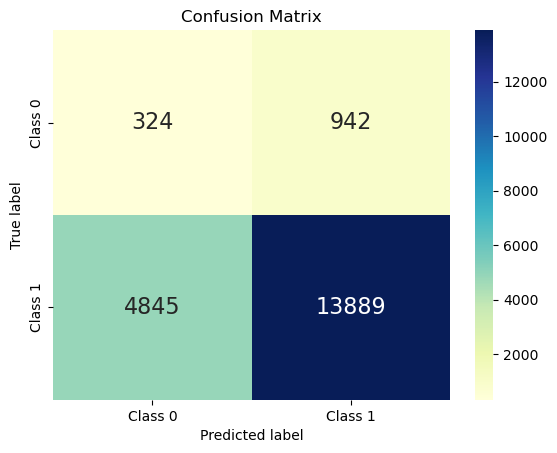

              precision    recall  f1-score   support

           0       0.06      0.26      0.10      1266
           1       0.94      0.74      0.83     18734

    accuracy                           0.71     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.88      0.71      0.78     20000

2-B performance evaluation


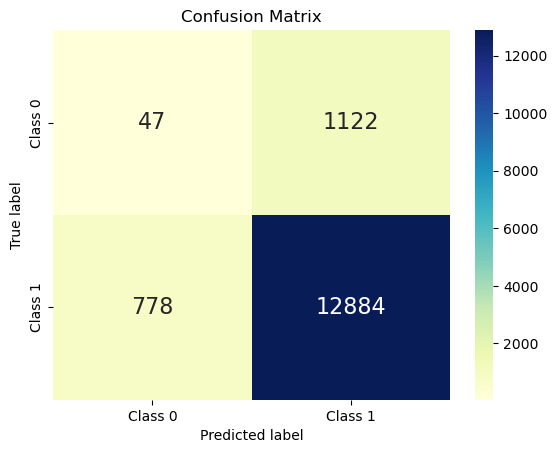

              precision    recall  f1-score   support

           0       0.06      0.04      0.05      1169
           1       0.92      0.94      0.93     13662

    accuracy                           0.87     14831
   macro avg       0.49      0.49      0.49     14831
weighted avg       0.85      0.87      0.86     14831

Model net performance evaluation


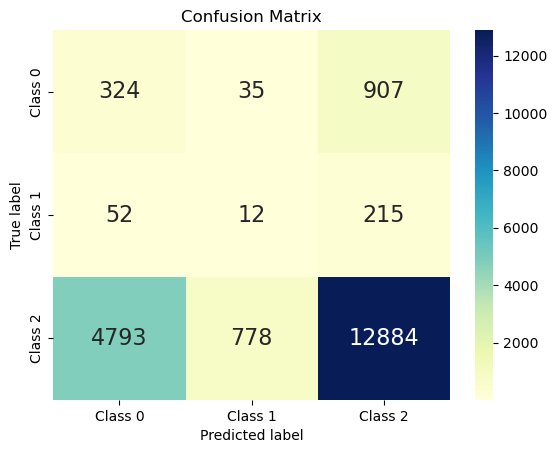

              precision    recall  f1-score   support

           0       0.06      0.26      0.10      1266
           1       0.01      0.04      0.02       279
           2       0.92      0.70      0.79     18455

    accuracy                           0.66     20000
   macro avg       0.33      0.33      0.31     20000
weighted avg       0.85      0.66      0.74     20000



In [108]:
# classifier 2-A alone
print("2-A performance evaluation")
perf_evaluate_plot(y_Final_test_2_A, y_Final_test_2_A_pred, n_class=2)

# classifier 2-B alone
print("2-B performance evaluation")
perf_evaluate_plot(y_Final_test_2_B, y_Final_test_2_B_pred, n_class=2)

# Net performance
print("Model net performance evaluation")
perf_evaluate_plot(Final_test_set["long_cat"], Final_test_set["2_B_label"], n_class=3)

#### Final words

The result is horrible to say the least. It was much better with the actual dataset for the problem that this model was built to solve. The main reason is the proportion of label 0 in both cases was very small. Although oversampling was used for counterbalancing, it was not effective. It says a lot about the importance of the quality of data for machine learning tasks.

Anyways, the idea of this notebook is to demonstrate how to test different algorithms with hyperparameter tuning to train a model and how to evaluate a model that has two-level architecture.